## Credit Approval data Modeling

For the purpose of developing a predictive classification model as whether to approve or denay credit applications for a financial institute in Australia i downloaded a data set intended for that purpose with 15 variables in which 14 would be the independent features while 1 is the target variable with a boolean value.Therefore it will be a case of binary classifier with two outcome classes.Lets find out about the dataset to better understand its characteristic and device the best way to deal with it in the analysis process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('./australian.txt', sep = ' ', header = None)

### Data Exploration

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
0     690 non-null int64
1     690 non-null float64
2     690 non-null float64
3     690 non-null int64
4     690 non-null int64
5     690 non-null int64
6     690 non-null float64
7     690 non-null int64
8     690 non-null int64
9     690 non-null int64
10    690 non-null int64
11    690 non-null int64
12    690 non-null int64
13    690 non-null int64
14    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


the dataset contains 690 non-null rows meaning there is no a single null value in the the data and 15 columns.The types of all the records is numeric which is either integer or float.This makes it quite difficult at this stage to tell weather we are dealing with numerical or categorical variables.But with further exploration things will get more evident.

The dataset is originally downloaded from UCI repository put as 'Statlog (Australian Credit Approval) Data Set', which was submitted by quinlan '@' cs.su.oz.au.you can see the description of the dataset on the 'australian.doc' file in my github account.I have renamed the column names with meaningless labels to reflect the data description file.But the original real meaning of the column names were deliberately removed by the author for confidentiality reasons.But they could theoretically be among the following attributes such as **Credit scores,Number of delinquencies,Hardinquirie
,Credit card utilization rate,Income,Credit history** and so forth. 

Lets rename the columns to reflect the Description in the data's readme file put as 'australian.doc'.

In [5]:
data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']

In [6]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A1     690 non-null int64
A2     690 non-null float64
A3     690 non-null float64
A4     690 non-null int64
A5     690 non-null int64
A6     690 non-null int64
A7     690 non-null float64
A8     690 non-null int64
A9     690 non-null int64
A10    690 non-null int64
A11    690 non-null int64
A12    690 non-null int64
A13    690 non-null int64
A14    690 non-null int64
A15    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [8]:
data.nunique()

A1       2
A2     350
A3     215
A4       3
A5      14
A6       8
A7     132
A8       2
A9       2
A10     23
A11      2
A12      3
A13    171
A14    240
A15      2
dtype: int64

From the above function's results we can understand that atleast 5 of the variables are continuous or numerical in nature because of the number of uniqie values which is almost consistent with the information provided in the data description put as 6 numerical and 8 categorical variables.

Lets creat an overview of the relationship between the pairs of numerical columns with respect to the outcome classes.Seaborn's pairplot function comes in to play to provide the visualization we need.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 432x288 with 0 Axes>

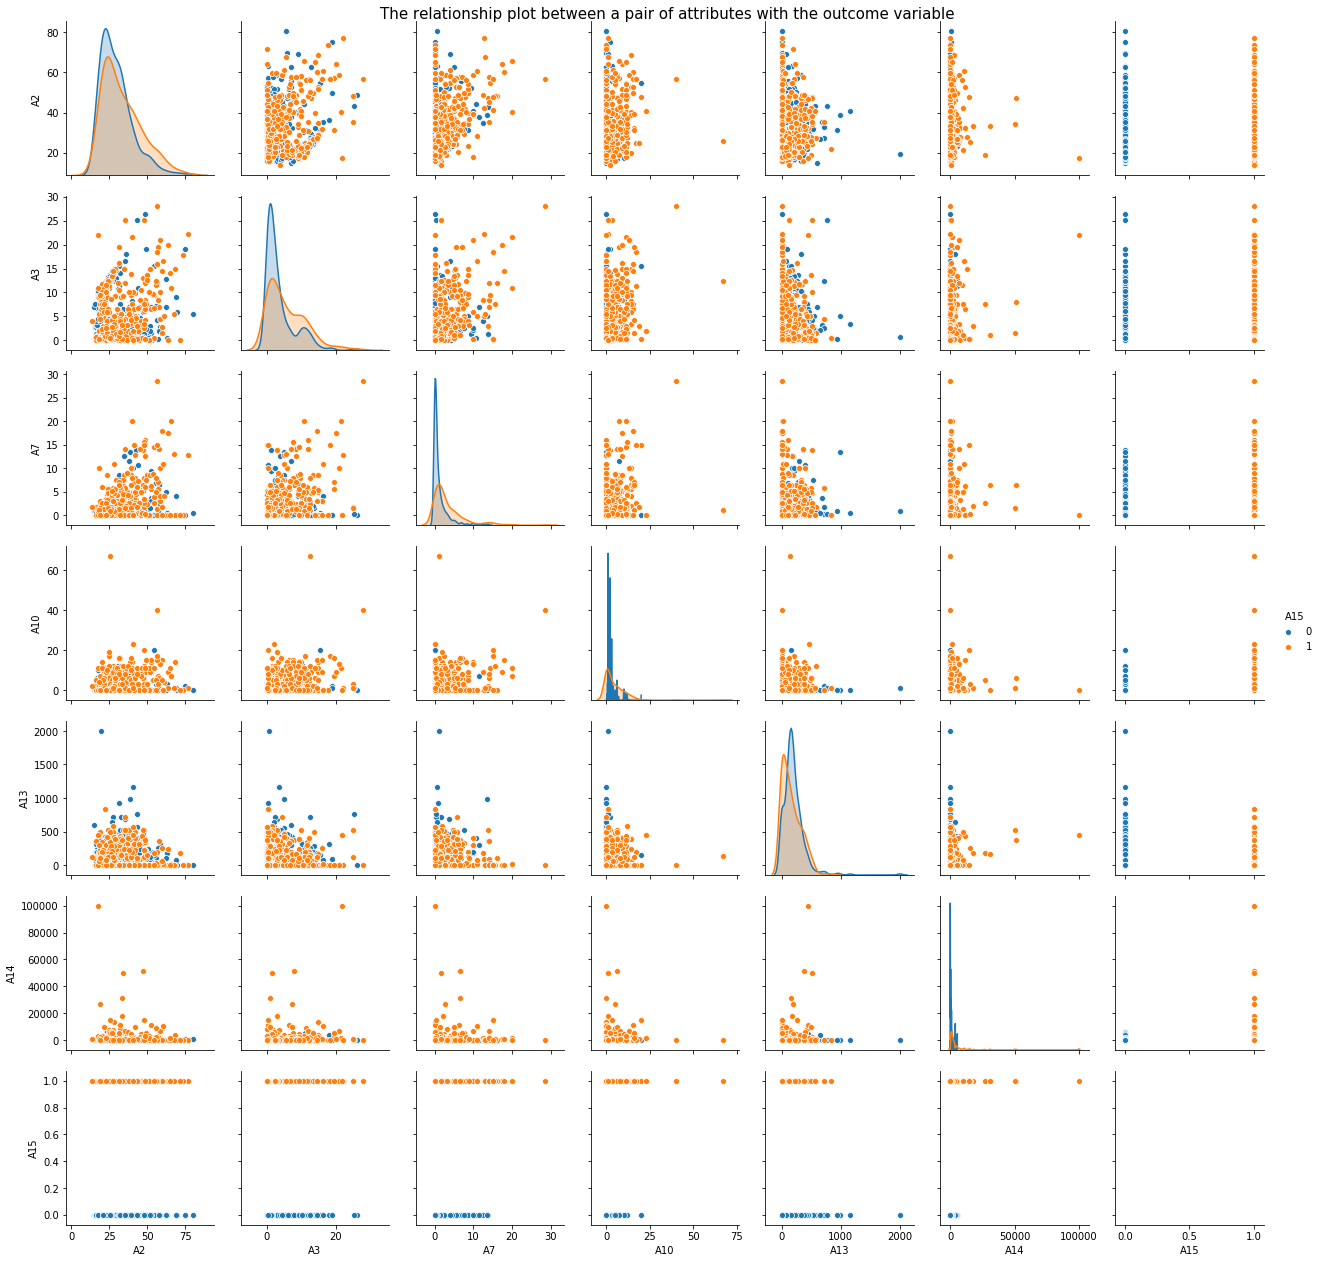

In [9]:
plt.figure();
sns.pairplot(data[['A2','A3','A7','A10','A13','A14', 'A15']], hue = 'A15')
plt.suptitle('The relationship plot between a pair of attributes with the outcome variable', fontsize = 15,y = 1.0)
plt.show()

Figure 1.

From the above pairplots(Figure 1) we can have an overview of the multicollinearity between the quantitative features which we don't see of concerning magnitude.And also it can give as hints as what models seems more robust for classifying the datas in to approving and desapproving of credit.

we can see from the above pairplot that the data points are so mixed up when divided in to the outcome classes.Even in some cases such as the pairs of A7&A14 and A10&A14 they are completely overlapped. even though it is difficult to plot and visually desern the effect of the multi-dimentional features(multi-dimentional space) on the classification task, the two dimentional scatter plot hints that it seems unpreferable to apply KNN,Logistic regression or other simple algorisms to deal with the task of higher accurate classification.In this case it would be more appropriate to do the tree algorisms with more imphasize on the ensemble models because;<br><br>1. we can use our dataset categorical variables encoding as is with out turning it in to one hot encoding or other categorical features labeling methods.<br><br>2. and also ensemble tree algorisms perform better for a small sampled data because of its advantage in accuracy level and in combating overfitting.<br><br>Therefore in this case i believe random forest or Gradient Boosting will outperform many algorisms if implemented with proper parameter tunning.

But first lets ckeck for a possible outliers in our numerical features to reduce bias in our analysis.

### Combating Outlier

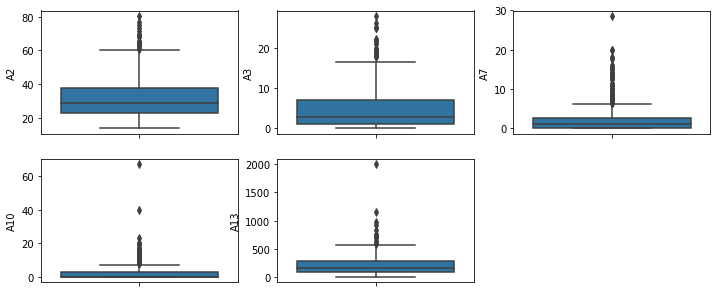

In [10]:
plt.figure(figsize = (12,5))
numerical_data = data[['A2','A3','A7','A10','A13','A14']]
for i, col in zip(np.arange(1,len(numerical_data.columns)), numerical_data.columns):
    plt.subplot(2,3,i)
    sns.boxplot(y = col, data = numerical_data)

Figure 2.

From the above boxplots(Figure 2),we can understand that the predictive variables have outliers.Those outliers will bias our models towords those extreme values causing variations in the predictions which leads to unstable model.Therefore we need to properly address those outliers before fitting the model.One way to do that is the scipy's Winsorize function.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


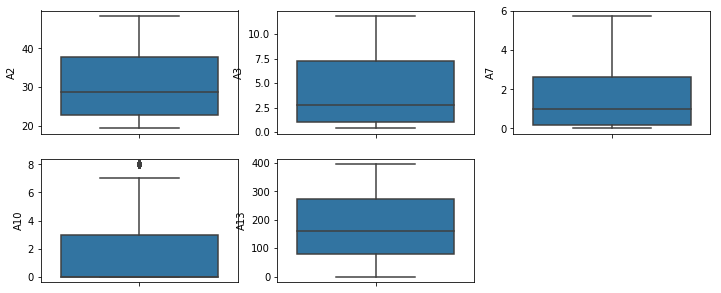

In [11]:
from scipy.stats.mstats import winsorize
for vars in numerical_data.columns:
    numerical_data[vars] = winsorize(numerical_data[vars], limits=0.10)
plt.figure(figsize = (12,5))    
for i, col in zip(np.arange(1,len(numerical_data.columns)), numerical_data.columns):
    plt.subplot(2,3,i)
    sns.boxplot(y = col, data = numerical_data)   

Figure 3.

Figure 3 shows that outliers are controlled.It is about time to implement our model but there is another important procedure that we always need to consider.are all the 14 features important to the performance of the model.If not Dimension reduction is necessary for model performane in terms of speed and issue of overfitting.It also helps to reduce the score differences of cross validation results.

### Dimension Reduction and Feature Selection

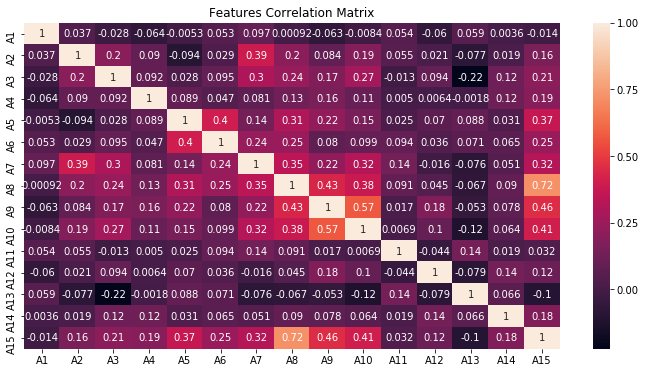

In [12]:
plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(),annot = True )
plt.title('Features Correlation Matrix');

Figure 4

In [13]:
selected_features = []
for feature in data.columns:
    if np.corrcoef(data[feature], data['A15'])[0][1] > 0.3:
        selected_features.append(feature)
selected_features

['A5', 'A7', 'A8', 'A9', 'A10', 'A15']

In [14]:
selected_features.pop()
selected_features

['A5', 'A7', 'A8', 'A9', 'A10']

### Creating and evaluating our Model 

Now that i have clearly identified the elements of my model after intensive data manupulation techniques,It is time to implement our model.My primary Model choice is **Random Forest** as i have indicated in my above explanations.Random Forest outperforms many simple algorisms and it is better with the issue of overfitting.Since my dataset is small in both dimensions,even speed will not be an issue in this case.

Out of the 14 independent variables, i selected only 5 by determining the strength of relationhip or correlation of each feature to the target variable(Refer Figure 4). From the correlation heatmap plot we can identify some association between explanatory variables 'A9' and 'A10'.This association may impact the explanatory power of one of the features.Lets apply a quick Random Forest Model with default parameters and check the importance of the features and their overall contribution to explaining the variation.And finally check if the result of the feature importance from the Sklearn function imphasizes the correlatiom matrix concept of association.

In [15]:
X = data[selected_features]
Y = data['A15']
X.columns

Index(['A5', 'A7', 'A8', 'A9', 'A10'], dtype='object')

In [16]:
import time
start_time = time.time()

rfc = RandomForestClassifier()
rfc.fit(X, Y)

print('The accuracy is: {} '.format(cross_val_score(rfc, X, Y, cv= 5)))

print('--- %s seconds ---' % (time.time() - start_time))
print('The Feature importance in the Model:{}'.format(rfc.feature_importances_))

The accuracy is: [0.89208633 0.79856115 0.87681159 0.78832117 0.81751825] 
--- 0.08005714416503906 seconds ---
The Feature importance in the Model:[0.14755566 0.26215318 0.35535032 0.03692136 0.19801947]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We can see from the above Feature importance results, that the association that we found between the outcome veriable and each features using the pearson's correlation matrix was aproved by the model performance.Lets now include only one variable and run our Model again to guage performance. 

In [17]:
X = data[selected_features].drop('A10', axis = 1)
Y = data['A15']
X.columns

Index(['A5', 'A7', 'A8', 'A9'], dtype='object')

In [18]:
import time
start_time = time.time()

rfc = RandomForestClassifier()
rfc.fit(X, Y)

rfc_cv = cross_val_score(rfc, X, Y, cv= 5)
print('The accuracy is: {} '.format(rfc_cv))

print('--- %s seconds ---' % (time.time() - start_time))
print('The Feature importance in the Model:{}'.format(rfc.feature_importances_))

The accuracy is: [0.87769784 0.75539568 0.82608696 0.79562044 0.81751825] 
--- 0.08058977127075195 seconds ---
The Feature importance in the Model:[0.15882417 0.2791838  0.44255724 0.11943479]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature contribution for the remaining variable was boosted a little bit while the performance remained about the same.So reducing dimension features to 4 is more feasible because of the principle of **parcimony** which states in simplest term that 'the simplest is probably the best solution'.

The explanation of the relation-ship between model variables and outputs is easy for statistical models, such as linear regressions, thanks to the availability of model parameters and their statistical signif-icance. For “black box” models, such as random forest, this information is hidden inside the model structure. This workpresents an approach for computing feature contributions for random forest classiﬁcation models. It allows for the determination of the inﬂuence of each variable on the model prediction for an individual instance.

### Hyperparameter Tuning and Evaluating our Random Forest Model

Lets Split training and testing data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state= 48)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# Model prediction
rfc_predict = rfc.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Lets use **Confusion matrix** and The **Area Under the Curve** to evaluate before and after hyperparameter tunning our model for explainging and guaging the model performance.The AUC is the area under the ROC curve. This score gives us a good idea of how well the model performs.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv.mean())

=== Confusion Matrix ===
[[102  17]
 [ 21  67]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       119
           1       0.80      0.76      0.78        88

    accuracy                           0.82       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.82      0.82      0.82       207



=== All AUC Scores ===
[0.87769784 0.75539568 0.82608696 0.79562044 0.81751825]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8144638335665965


Next step is Tuning hypermarameters using RandomizedSearchCV by applying list of values of parameters of Random forest model and trying to itirate over every combination of parameters to try on the train_test splited data.And then comes up with the best combination of parameter values for our model.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100, stop = 300, num = 20)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print the best combination of parameters
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.2s finished


{'n_estimators': 257, 'max_features': 'auto', 'max_depth': 100}


After Fitting 3 folds for each of 100 candidates, totalling 300 fits our cross validation algorism found that **{'n_estimators': 257, 'max_features': 'auto', 'max_depth': 100}** is the best hyperparameter.Lets check if it has improved the performance of our model.

In [29]:
rfc = RandomForestClassifier(n_estimators= 257, max_features= 'auto', max_depth= 100)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv = cross_val_score(rfc, X, Y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv.mean())

=== Confusion Matrix ===
[[105  14]
 [ 14  74]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       119
           1       0.84      0.84      0.84        88

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



=== All AUC Scores ===
[0.92969396 0.94086022 0.85938792 0.88582343 0.91511036 0.94142615
 0.83913413 0.8627193  0.92192982 0.89868421]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8994769491968133


Therefore We can see that the model performance was boosted from 0.81 to 0.9 with tuning hypermarameters which a boost by 9 percent.

## Summary

Lets rappup all the process of our analysis from the questions we wanted to solve to the prosess and finaly chosing the best model and training our data with that model for the best classification prediction.

After downloading the dataset, i identified the features as numerical and categorical based on their unique value.The dataset was in a proper format meaning that its categorical variables has been already incoded in to numerical values.Some of the using one hot encoding and others in to ordinal data.This transformation and the nature of the relationship between the numerical variables with respect to the target variable lead me to chose Random Forest Model for predicting whether to approve or denay a customer credit.

to Decrease biasness in my prediction, I combated outliers using Winsorize Function from scipy.stats Library.And Then i moved on to the feature engineering phase with selecting only 4 features with significant effect on the outcome variable out of the 14 features.I used correlation matrix to discover the relationship and viasualized it using Seaborn's heatmap plotting function.

And then i created the Random Forest Model and evaluated it using cross validation, Confusion matrix and Area under the ROC curve.Next i did hypermarameter tunning and came up with the best 3 hypermarameters namely the 'n_estimator', 'max_features' and 'max_depth' that maximize our score.I used the SkLearn's RandomizedsearchCV function to attain that task and after doing so my model improved performance by over 7%.